# 8.1. Sequence Models

Imagine that you are watching movies on Netflix. As a good Netflix user, you decide to rate each of the movies religiously. After all, a good movie is a good movie, and you want to watch more of them, right? As it turns out, things are not quite so simple. People’s opinions on movies can change quite significantly over time. In fact, psychologists even have names for some of the effects:

There is anchoring, based on someone else’s opinion. For instance, after the Oscar awards, ratings for the corresponding movie go up, even though it is still the same movie. This effect persists for a few months until the award is forgotten. It has been shown that the effect lifts rating by over half a point [Wu et al., 2017].

There is the hedonic adaptation, where humans quickly adapt to accept an improved or a worsened situation as the new normal. For instance, after watching many good movies, the expectations that the next movie is equally good or better are high. Hence, even an average movie might be considered as bad after many great ones are watched.

There is seasonality. Very few viewers like to watch a Santa Claus movie in August.

In some cases, movies become unpopular due to the misbehaviors of directors or actors in the production.

Some movies become cult movies, because they were almost comically bad. Plan 9 from Outer Space and Troll 2 achieved a high degree of notoriety for this reason.

In short, movie ratings are anything but stationary. Thus, using temporal dynamics led to more accurate movie recommendations [Koren, 2009]. Of course, sequence data are not just about movie ratings. The following gives more illustrations.

Many users have highly particular behavior when it comes to the time when they open apps. For instance, social media apps are much more popular after school with students. Stock market trading apps are more commonly used when the markets are open.

It is much harder to predict tomorrow’s stock prices than to fill in the blanks for a stock price we missed yesterday, even though both are just a matter of estimating one number. After all, foresight is so much harder than hindsight. In statistics, the former (predicting beyond the known observations) is called extrapolation whereas the latter (estimating between the existing observations) is called interpolation.

Music, speech, text, and videos are all sequential in nature. If we were to permute them they would make little sense. The headline dog bites man is much less surprising than man bites dog, even though the words are identical.

Earthquakes are strongly correlated, i.e., after a massive earthquake there are very likely several smaller aftershocks, much more so than without the strong quake. In fact, earthquakes are spatiotemporally correlated, i.e., the aftershocks typically occur within a short time span and in close proximity.

Humans interact with each other in a sequential nature, as can be seen in Twitter fights, dance patterns, and debates.

## 8.1.1. Statistical Tools
We need statistical tools and new deep neural network architectures to deal with sequence data. To keep things simple, we use the stock price (FTSE 100 index) illustrated in Fig. 8.1.1 as an example.

Let us denote the prices by  xt , i.e., at time step  t∈Z+  we observe price  xt . Note that for sequences in this text,  t  will typically be discrete and vary over integers or its subset. Suppose that a trader who wants to do well in the stock market on day  t  predicts  xt  via

xt∼P(xt∣xt−1,…,x1).
 
### 8.1.1.1. Autoregressive Models
In order to achieve this, our trader could use a regression model such as the one that we trained in Section 3.3. There is just one major problem: the number of inputs,  xt−1,…,x1  varies, depending on  t . That is to say, the number increases with the amount of data that we encounter, and we will need an approximation to make this computationally tractable. Much of what follows in this chapter will revolve around how to estimate  P(xt∣xt−1,…,x1)  efficiently. In a nutshell it boils down to two strategies as follows.

First, assume that the potentially rather long sequence  xt−1,…,x1  is not really necessary. In this case we might content ourselves with some timespan of length  τ  and only use  xt−1,…,xt−τ  observations. The immediate benefit is that now the number of arguments is always the same, at least for  t>τ . This allows us to train a deep network as indicated above. Such models will be called autoregressive models, as they quite literally perform regression on themselves.

The second strategy, shown in Fig. 8.1.2, is to keep some summary  ht  of the past observations, and at the same time update  ht  in addition to the prediction  x^t . This leads to models that estimate  xt  with  x^t=P(xt∣ht)  and moreover updates of the form  ht=g(ht−1,xt−1) . Since  ht  is never observed, these models are also called latent autoregressive models.

Both cases raise the obvious question of how to generate training data. One typically uses historical observations to predict the next observation given the ones up to right now. Obviously we do not expect time to stand still. However, a common assumption is that while the specific values of  xt  might change, at least the dynamics of the sequence itself will not. This is reasonable, since novel dynamics are just that, novel and thus not predictable using data that we have so far. Statisticians call dynamics that do not change stationary. Regardless of what we do, we will thus get an estimate of the entire sequence via

P(x1,…,xT)=∏t=1TP(xt∣xt−1,…,x1).
 
Note that the above considerations still hold if we deal with discrete objects, such as words, rather than continuous numbers. The only difference is that in such a situation we need to use a classifier rather than a regression model to estimate  P(xt∣xt−1,…,x1) .

### 8.1.1.2. Markov Models
Recall the approximation that in an autoregressive model we use only  xt−1,…,xt−τ  instead of  xt−1,…,x1  to estimate  xt . Whenever this approximation is accurate we say that the sequence satisfies a Markov condition. In particular, if  τ=1 , we have a first-order Markov model and  P(x)  is given by

P(x1,…,xT)=∏t=1TP(xt∣xt−1) where P(x1∣x0)=P(x1).
 
Such models are particularly nice whenever  xt  assumes only a discrete value, since in this case dynamic programming can be used to compute values along the chain exactly. For instance, we can compute  P(xt+1∣xt−1)  efficiently:

P(xt+1∣xt−1)=∑xtP(xt+1,xt,xt−1)P(xt−1)=∑xtP(xt+1∣xt,xt−1)P(xt,xt−1)P(xt−1)=∑xtP(xt+1∣xt)P(xt∣xt−1)
 
by using the fact that we only need to take into account a very short history of past observations:  P(xt+1∣xt,xt−1)=P(xt+1∣xt) . Going into details of dynamic programming is beyond the scope of this section. Control and reinforcement learning algorithms use such tools extensively.

### 8.1.1.3. Causality
In principle, there is nothing wrong with unfolding  P(x1,…,xT)  in reverse order. After all, by conditioning we can always write it via

P(x1,…,xT)=∏t=T1P(xt∣xt+1,…,xT).
 
In fact, if we have a Markov model, we can obtain a reverse conditional probability distribution, too. In many cases, however, there exists a natural direction for the data, namely going forward in time. It is clear that future events cannot influence the past. Hence, if we change  xt , we may be able to influence what happens for  xt+1  going forward but not the converse. That is, if we change  xt , the distribution over past events will not change. Consequently, it ought to be easier to explain  P(xt+1∣xt)  rather than  P(xt∣xt+1) . For instance, it has been shown that in some cases we can find  xt+1=f(xt)+ϵ  for some additive noise  ϵ , whereas the converse is not true [Hoyer et al., 2009]. This is great news, since it is typically the forward direction that we are interested in estimating. The book by Peters et al. has explained more on this topic [Peters et al., 2017a]. We are barely scratching the surface of it.

## 8.1.2. Training

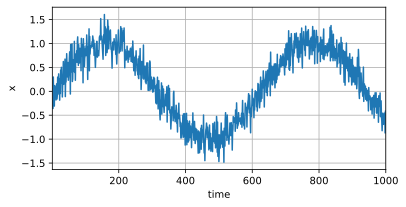

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

T = 1000  # Generate a total of 1000 points
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [2]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
# Only the first `n_train` examples are used for training
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

In [3]:
# Function for initializing the weights of the network
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

# A simple MLP
def get_net():
    net = nn.Sequential(nn.Linear(4, 10),
                        nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weights)
    return net

# Note: `MSELoss` computes squared error without the 1/2 factor
loss = nn.MSELoss(reduction='none')

In [4]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.070573
epoch 2, loss: 0.061354
epoch 3, loss: 0.057127
epoch 4, loss: 0.058164
epoch 5, loss: 0.060350


## 8.1.3. Prediction

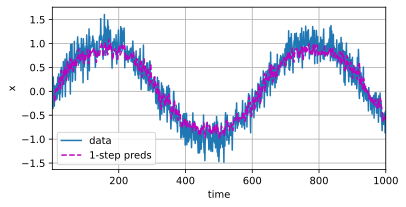

In [5]:
onestep_preds = net(features)
d2l.plot([time, time[tau:]], [x.detach().numpy(), onestep_preds.detach().numpy()], 'time',
         'x', legend=['data', '1-step preds'], xlim=[1, 1000], figsize=(6, 3))

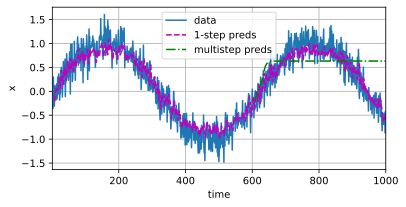

In [6]:
multistep_preds = torch.zeros(T)
multistep_preds[: n_train + tau] = x[: n_train + tau]
for i in range(n_train + tau, T):
    multistep_preds[i] = net(
        multistep_preds[i - tau:i].reshape((1, -1)))

d2l.plot([time, time[tau:], time[n_train + tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy(),
          multistep_preds[n_train + tau:].detach().numpy()], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[1, 1000], figsize=(6, 3))

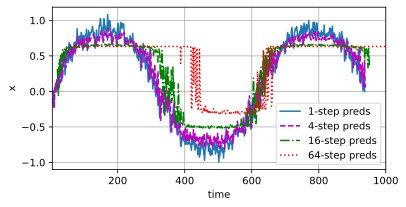

In [7]:
max_steps = 64

features = torch.zeros((T - tau - max_steps + 1, tau + max_steps))
# Column `i` (`i` < `tau`) are observations from `x` for time steps from
# `i + 1` to `i + T - tau - max_steps + 1`
for i in range(tau):
    features[:, i] = x[i: i + T - tau - max_steps + 1]

# Column `i` (`i` >= `tau`) are the (`i - tau + 1`)-step-ahead predictions for
# time steps from `i + 1` to `i + T - tau - max_steps + 1`
for i in range(tau, tau + max_steps):
    features[:, i] = net(features[:, i - tau:i]).reshape(-1)

steps = (1, 4, 16, 64)
d2l.plot([time[tau + i - 1: T - max_steps + i] for i in steps],
         [features[:, (tau + i - 1)].detach().numpy() for i in steps], 'time', 'x',
         legend=[f'{i}-step preds' for i in steps], xlim=[5, 1000],
         figsize=(6, 3))

## 8.1.4. Summary

There is quite a difference in difficulty between interpolation and extrapolation. Consequently, if you have a sequence, always respect the temporal order of the data when training, i.e., never train on future data.

Sequence models require specialized statistical tools for estimation. Two popular choices are autoregressive models and latent-variable autoregressive models.

For causal models (e.g., time going forward), estimating the forward direction is typically a lot easier than the reverse direction.

For an observed sequence up to time step  t , its predicted output at time step  t+k  is the  k -step-ahead prediction. As we predict further in time by increasing  k , the errors accumulate and the quality of the prediction degrades, often dramatically.